 - Cerebellum_8_Right
 - Parahippocampal_L
 - Cerebellum_8_Left
 - Parahippocampal_R
 - Cerebellum_9_Left
 - Inferior_Temporal_R
 - Accumbens_R
 - Accumbens_L
 - Middle_Temporal_L
 - Cerebellum_9_Right
 - Superior_Parietal_R
 - Inferior_Parietal_R
 - Inferior_Parietal_L
 - Middle_Orbital_R
 - SMA_L
 - Middle_Frontal_L
 - Corpus_Callosum
 - Cerebellum_10_Right
 - Cerebellum_10_Left
 - Vermis_3_4_5
 - SMA_R
 - Superior_Temporal_R
 - Superior_Frontal_L
 - Inferior_Frontal_L
 - Inferior_Frontal_R
 - Superior_Temporal_L
 - Superior_Parietal_L
 - Superior_Frontal_R
 - Middle_Orbital_L
 - Middle_Temporal_R
 - Middle_Frontal_R
 - Inferior_Temporal_L
Error: No data is being plotted. Please check your ROI data and threshold.


/tmp/ipykernel_1985804/3788215820.py:160: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Alternatives: 'plasma', 'magma', 'inferno', 'coolwarm'
/home/songlinzhao/anaconda3/envs/normodiff/lib/python3.10/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(
/tmp/ipykernel_1985804/3788215820.py:206: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


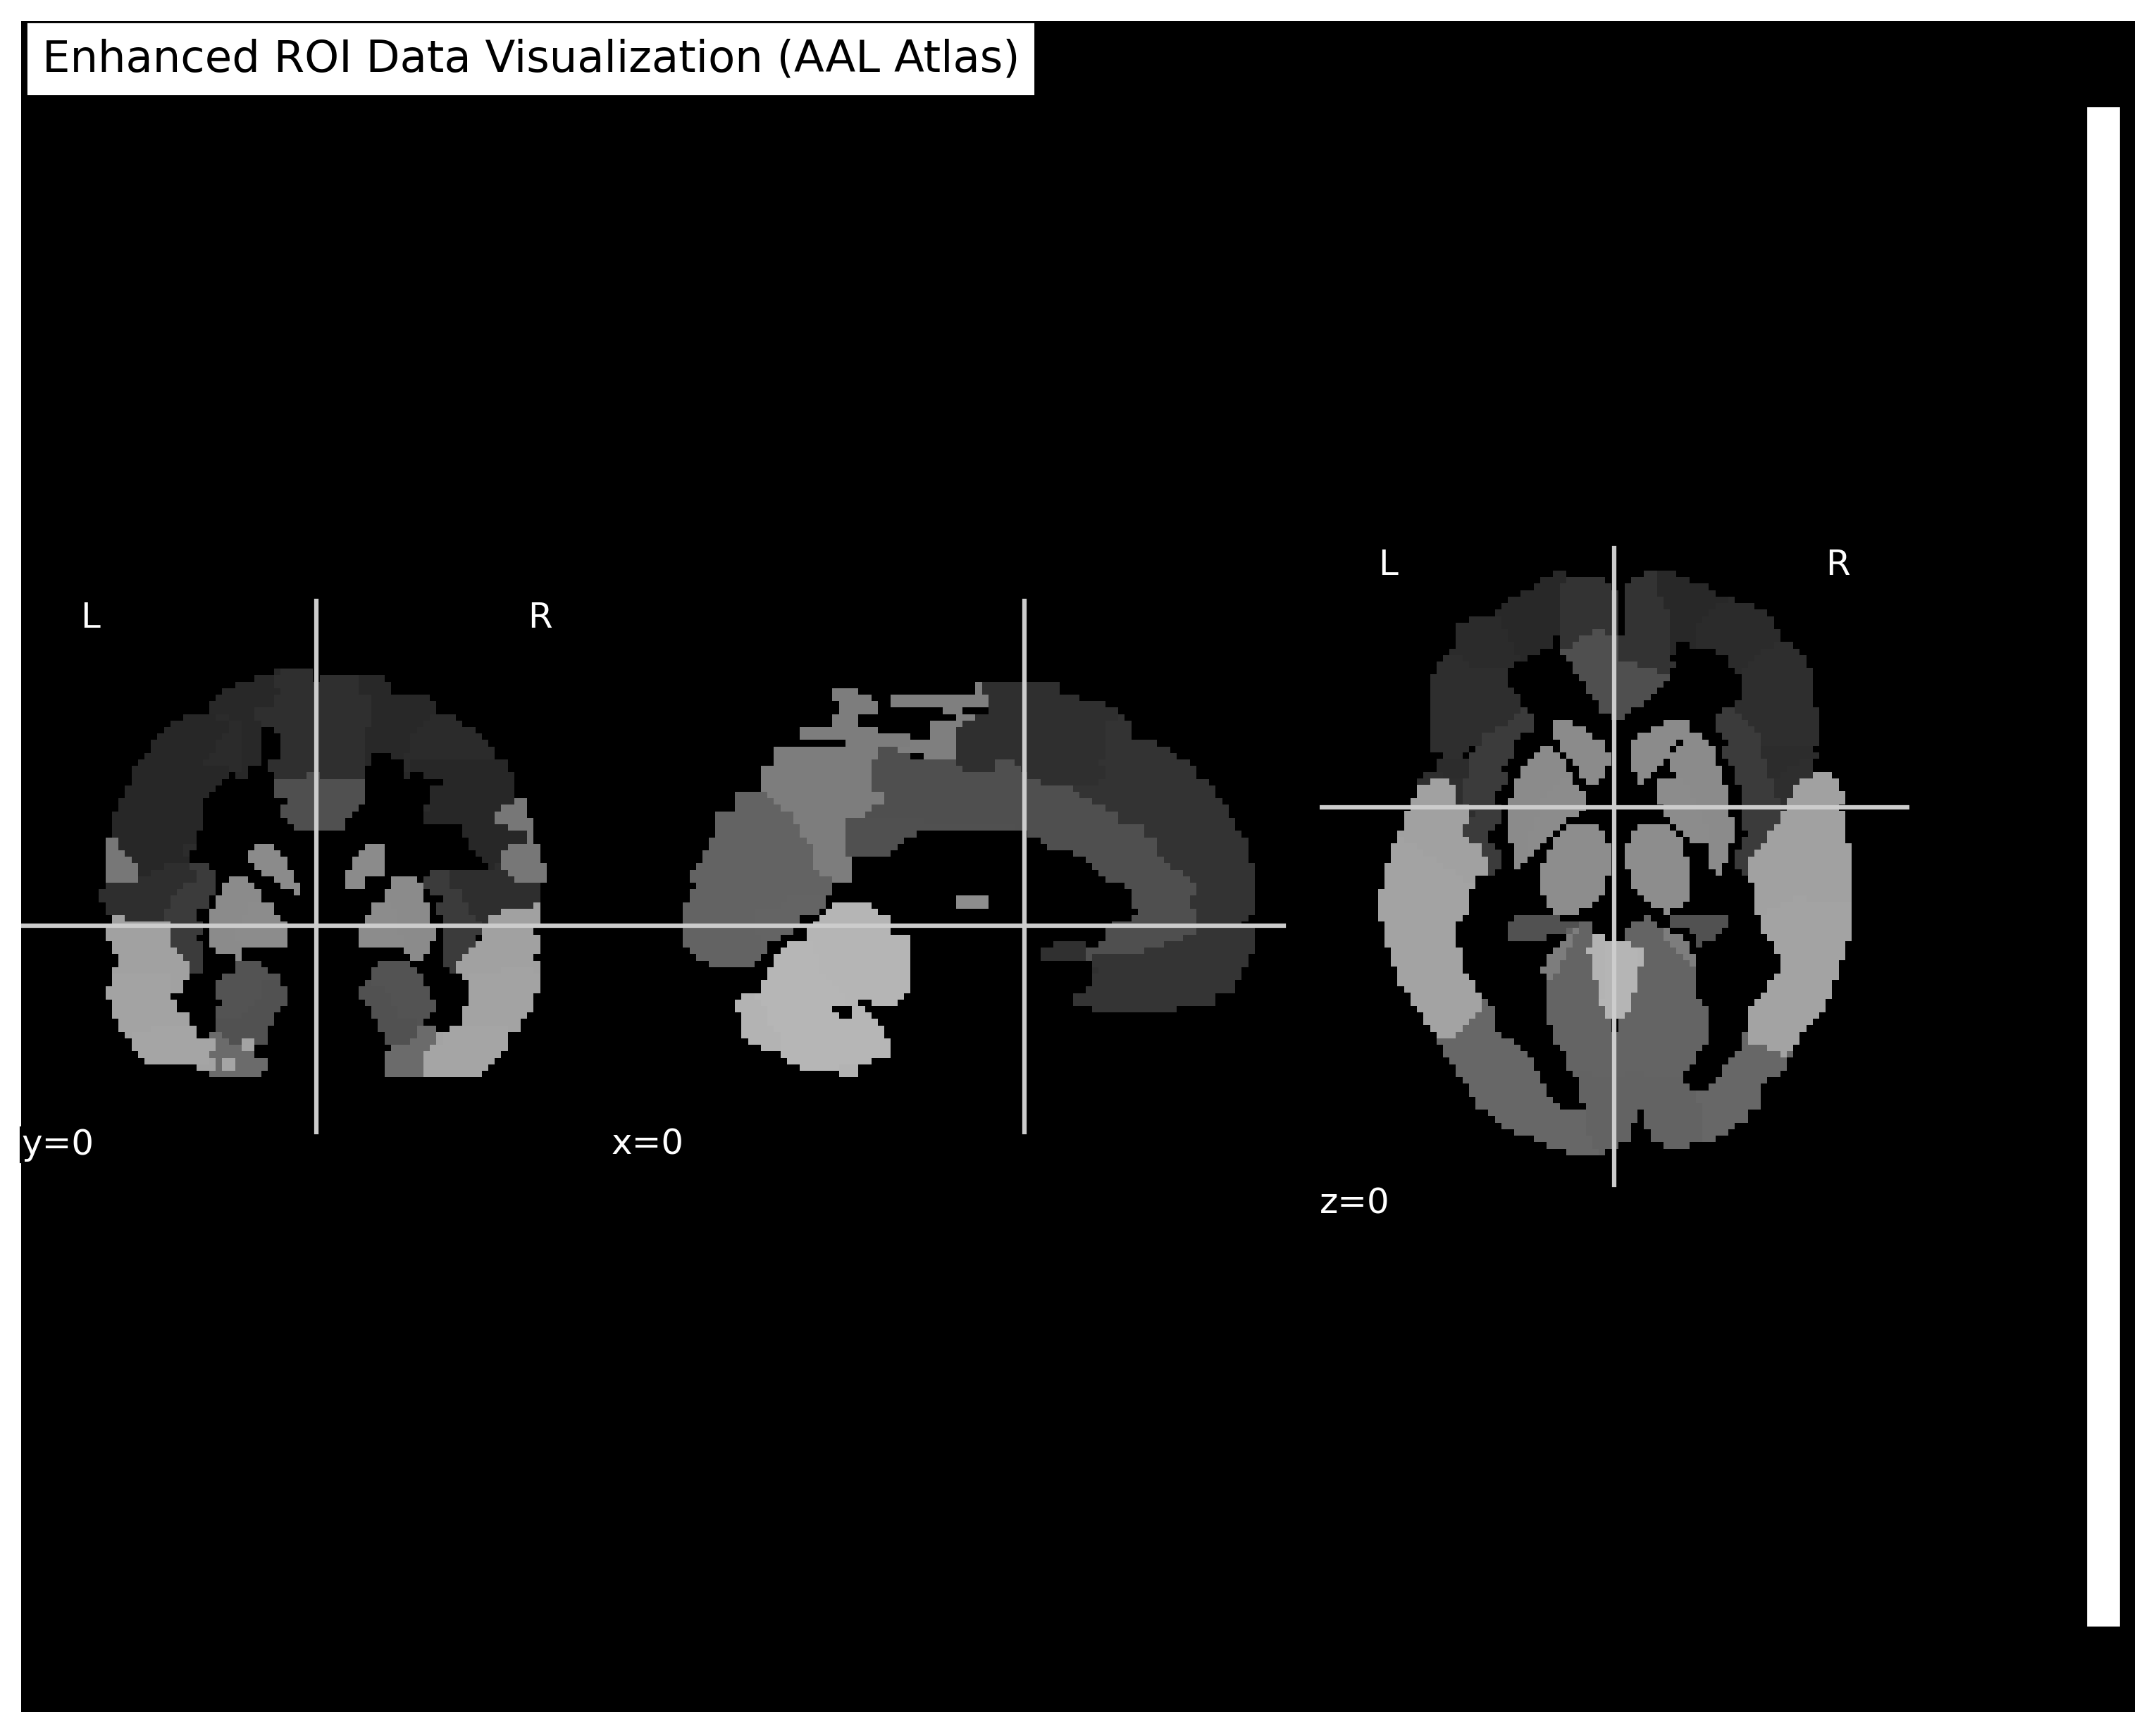

: 

In [1]:
import numpy as np
import nibabel as nib
from nilearn import datasets, plotting, image
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1. Define Your ROI Data as a Dictionary
roi_data = {
    # Left Hemisphere
    'Precentral_L': 2.5,
    'Postcentral_L': 3.0,
    'Superior_Frontal_L': 1.8,
    'Middle_Frontal_L': 2.2,
    'Inferior_Frontal_L': 1.5,
    'Superior_Parietal_L': 2.8,
    'Inferior_Parietal_L': 2.0,
    'Superior_Temporal_L': 1.9,
    'Middle_Temporal_L': 2.1,
    'Inferior_Temporal_L': 1.7,
    'Heschl_L': 1.6,
    'Parahippocampal_L': 2.3,
    'Caudate_L': 2.4,
    'Putamen_L': 2.2,
    'Pallidum_L': 1.9,
    'Thalamus_L': 2.5,
    'Accumbens_L': 1.8,
    'Insula_L': 2.0,
    'Lingual_L': 1.7,
    'Cuneus_L': 1.5,
    'Fusiform_L': 1.6,
    'Vermis_1_2': 1.2,
    'Vermis_3_4_5': 1.3,
    'Frontal_Sup_Orb_L': 1.4,
    'Frontal_Mid_Orb_L': 1.5,
    'Temporal_Sup_L': 1.8,
    'Temporal_Mid_L': 2.0,
    'Temporal_Inf_L': 1.7,
    'Occipital_Sup_L': 1.6,
    'Occipital_Mid_L': 1.4,
    'Occipital_Inf_L': 1.3,
    'Paracentral_Lobule_L': 1.9,
    'Olfactory_L': 1.1,
    'Rectus_L': 1.2,
    'Middle_Orbital_L': 1.3,
    'SMA_L': 2.1,
    'Cingulum_Ant_L': 1.8,
    'Cingulum_Mid_L': 1.9,
    'Cingulum_Post_L': 1.7,
    'ParaHippocampal_L': 2.3,
    'Amygdala_L': 2.4,

    # Right Hemisphere
    'Precentral_R': 2.6,
    'Postcentral_R': 3.1,
    'Superior_Frontal_R': 1.9,
    'Middle_Frontal_R': 2.3,
    'Inferior_Frontal_R': 1.6,
    'Superior_Parietal_R': 2.9,
    'Inferior_Parietal_R': 2.1,
    'Superior_Temporal_R': 2.0,
    'Middle_Temporal_R': 2.2,
    'Inferior_Temporal_R': 1.8,
    'Heschl_R': 1.7,
    'Parahippocampal_R': 2.4,
    'Caudate_R': 2.5,
    'Putamen_R': 2.3,
    'Pallidum_R': 2.0,
    'Thalamus_R': 2.6,
    'Accumbens_R': 1.9,
    'Insula_R': 2.1,
    'Lingual_R': 1.8,
    'Cuneus_R': 1.6,
    'Fusiform_R': 1.7,
    'Vermis_1_2': 1.2,  # Vermis is midline, same for both hemispheres
    'Vermis_3_4_5': 1.3,
    'Frontal_Sup_Orb_R': 1.4,
    'Frontal_Mid_Orb_R': 1.5,
    'Temporal_Sup_R': 1.9,
    'Temporal_Mid_R': 2.1,
    'Temporal_Inf_R': 1.8,
    'Occipital_Sup_R': 1.7,
    'Occipital_Mid_R': 1.5,
    'Occipital_Inf_R': 1.4,
    'Paracentral_Lobule_R': 2.0,
    'Olfactory_R': 1.1,
    'Rectus_R': 1.2,
    'Middle_Orbital_R': 1.3,
    'SMA_R': 2.2,
    'Cingulum_Ant_R': 1.8,
    'Cingulum_Mid_R': 1.9,
    'Cingulum_Post_R': 1.7,
    'ParaHippocampal_R': 2.4,
    'Amygdala_R': 2.4,

    # Midline Structures
    'Corpus_Callosum': 2.0,
    'Cerebellum_8_Left': 1.5,
    'Cerebellum_8_Right': 1.5,
    'Cerebellum_9_Left': 1.6,
    'Cerebellum_9_Right': 1.6,
    'Cerebellum_10_Left': 1.7,
    'Cerebellum_10_Right': 1.7,
    # ... Add more midline or other regions as needed
}

# 2. Load the AAL Atlas
aal = datasets.fetch_atlas_aal(version='SPM12')  # You can specify the version if needed
atlas_filename = aal['maps']
atlas_labels = aal['labels']

# Optional: Display available labels (for verification)
# print("Available ROIs in AAL Atlas:")
# for label in atlas_labels:
#     print(label)

# 3. Verify ROI Names and Identify Missing ROIs
data_rois = set(roi_data.keys())
atlas_rois = set(atlas_labels)
missing_rois = data_rois - atlas_rois

if missing_rois:
    print("Warning: The following ROIs were not found in the AAL atlas:")
    for roi in missing_rois:
        print(f" - {roi}")
else:
    print("All ROIs matched successfully.")

# 4. Map Your Data to the Atlas
# Initialize an array with zeros
atlas_img = nib.load(atlas_filename)
atlas_data = atlas_img.get_fdata()
data_array = np.zeros(atlas_data.shape)

# Create a mapping from ROI name to index (AAL atlas indices start at 1)
label_to_index = {label: idx for idx, label in enumerate(atlas_labels, start=1)}

# Assign your data to the corresponding ROIs
for roi_name, value in roi_data.items():
    if roi_name in label_to_index:
        roi_index = label_to_index[roi_name]
        data_array[atlas_data == roi_index] = value
    else:
        continue  # Already warned about missing ROIs

# Check if any data is non-zero
if not np.any(data_array):
    print("Error: No data is being plotted. Please check your ROI data and threshold.")
    exit()

# 5. Create a Nifti Image with Your Data
data_img = nib.Nifti1Image(data_array, affine=atlas_img.affine)

# Optional: Smooth the data for better visualization
# Adjust the fwhm (full-width half-maximum) as needed
smoothed_img = image.smooth_img(data_img, fwhm=6)

# 6. Define a Refined Colormap
# Choose a perceptually uniform colormap suitable for medical imaging
cmap = cm.get_cmap('viridis')  # Alternatives: 'plasma', 'magma', 'inferno', 'coolwarm'

# 7. Visualize the Data with Enhanced Style
# Set up the figure for higher resolution
plt.figure(figsize=(10, 8), dpi=300)

# Plot the statistical map with enhanced settings
display = plotting.plot_stat_map(
    smoothed_img,
    bg_img=atlas_filename,  # Use a high-resolution background image
    title="Enhanced ROI Data Visualization (AAL Atlas)",
    cmap=cmap,
    # threshold=np.min(list(roi_data.values())) * 0.5,  # Lower threshold to ensure data is visible
    display_mode='ortho',  # Options: 'ortho', 'x', 'y', 'z', 'glass_brain', etc.
    cut_coords=(0, 0, 0),
    colorbar=True,
    alpha=0.6,  # Adjust transparency
    figure=plt.gcf(),  # Use the current figure
)

# Enhance the colorbar without causing errors
# Access the colorbar via the figure's axes
fig = plt.gcf()
axes = fig.axes

# Assuming the colorbar is the last axis
if len(axes) > 1:
    cbar_ax = axes[-1]
    # Attempt to retrieve the colorbar
    if hasattr(cbar_ax, 'collections') and len(cbar_ax.collections) > 0:
        cbar = cbar_ax.collections[0].colorbar
        cbar.set_label('ROI Value', fontsize=12, labelpad=15)
        cbar.ax.tick_params(labelsize=10)
    else:
        print("Warning: Colorbar collections are empty. Attempting alternative method.")
        # Alternative: Access the colorbar as an image
        if len(cbar_ax.images) > 0:
            cbar = cbar_ax.images[0].colorbar
            cbar.set_label('ROI Value', fontsize=12, labelpad=15)
            cbar.ax.tick_params(labelsize=10)
        else:
            print("Warning: Colorbar not found.")
else:
    print("Warning: No colorbar axes found.")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Optional: Save the figure in high resolution
plt.savefig('enhanced_roi_visualization.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import datasets, plotting, image
from nilearn.maskers import NiftiLabelsMasker

# 1. Load Your ROI Data
# Replace this with your actual data loading method
# Example using a dictionary
roi_data = {
    # Left Hemisphere
    'Precentral_L': 2.5,
    'Postcentral_L': 3.0,
    'Superior_Frontal_L': 1.8,
    'Middle_Frontal_L': 2.2,
    'Inferior_Frontal_L': 1.5,
    'Superior_Parietal_L': 2.8,
    'Inferior_Parietal_L': 2.0,
    'Superior_Temporal_L': 1.9,
    'Middle_Temporal_L': 2.1,
    'Inferior_Temporal_L': 1.7,
    'Heschl_L': 1.6,
    'Parahippocampal_L': 2.3,
    'Caudate_L': 2.4,
    'Putamen_L': 2.2,
    'Pallidum_L': 1.9,
    'Thalamus_L': 2.5,
    'Accumbens_L': 1.8,
    'Insula_L': 2.0,
    'Lingual_L': 1.7,
    'Cuneus_L': 1.5,
    'Fusiform_L': 1.6,
    'Lingual_L': 1.7,
    'Vermis_1_2': 1.2,
    'Vermis_3_4_5': 1.3,
    'Frontal_Sup_Orb_L': 1.4,
    'Frontal_Mid_Orb_L': 1.5,
    'Temporal_Sup_L': 1.8,
    'Temporal_Mid_L': 2.0,
    'Temporal_Inf_L': 1.7,
    'Occipital_Sup_L': 1.6,
    'Occipital_Mid_L': 1.4,
    'Occipital_Inf_L': 1.3,
    'Paracentral_Lobule_L': 1.9,
    'Olfactory_L': 1.1,
    'Rectus_L': 1.2,
    'Middle_Orbital_L': 1.3,
    'SMA_L': 2.1,
    'Cingulum_Ant_L': 1.8,
    'Cingulum_Mid_L': 1.9,
    'Cingulum_Post_L': 1.7,
    'ParaHippocampal_L': 2.3,
    'Amygdala_L': 2.4,

    # Right Hemisphere
    'Precentral_R': 2.6,
    'Postcentral_R': 3.1,
    'Superior_Frontal_R': 1.9,
    'Middle_Frontal_R': 2.3,
    'Inferior_Frontal_R': 1.6,
    'Superior_Parietal_R': 2.9,
    'Inferior_Parietal_R': 2.1,
    'Superior_Temporal_R': 2.0,
    'Middle_Temporal_R': 2.2,
    'Inferior_Temporal_R': 1.8,
    'Heschl_R': 1.7,
    'Parahippocampal_R': 2.4,
    'Caudate_R': 2.5,
    'Putamen_R': 2.3,
    'Pallidum_R': 2.0,
    'Thalamus_R': 2.6,
    'Accumbens_R': 1.9,
    'Insula_R': 2.1,
    'Lingual_R': 1.8,
    'Cuneus_R': 1.6,
    'Fusiform_R': 1.7,
    'Lingual_R': 1.8,
    'Vermis_1_2': 1.2,  # Vermis is midline, same for both hemispheres
    'Vermis_3_4_5': 1.3,
    'Frontal_Sup_Orb_R': 1.4,
    'Frontal_Mid_Orb_R': 1.5,
    'Temporal_Sup_R': 1.9,
    'Temporal_Mid_R': 2.1,
    'Temporal_Inf_R': 1.8,
    'Occipital_Sup_R': 1.7,
    'Occipital_Mid_R': 1.5,
    'Occipital_Inf_R': 1.4,
    'Paracentral_Lobule_R': 2.0,
    'Olfactory_R': 1.1,
    'Rectus_R': 1.2,
    'Middle_Orbital_R': 1.3,
    'SMA_R': 2.2,
    'Cingulum_Ant_R': 1.8,
    'Cingulum_Mid_R': 1.9,
    'Cingulum_Post_R': 1.7,
    'ParaHippocampal_R': 2.4,
    'Amygdala_R': 2.4,

    # Midline Structures
    'Vermis_1_2': 1.2,
    'Vermis_3_4_5': 1.3,
    'Corpus_Callosum': 2.0,
    'Cerebellum_8_Left': 1.5,
    'Cerebellum_8_Right': 1.5,
    'Cerebellum_9_Left': 1.6,
    'Cerebellum_9_Right': 1.6,
    'Cerebellum_10_Left': 1.7,
    'Cerebellum_10_Right': 1.7,
    # ... Add more midline or other regions as needed
}


# Alternatively, if you have a CSV file:
# df = pd.read_csv('your_data.csv')  # Ensure columns are 'ROI' and 'Value'
# roi_data = dict(zip(df['ROI'], df['Value']))

# 2. Load the AAL Atlas
aal = datasets.fetch_atlas_aal(version='SPM12')  # You can specify the version if needed
atlas_filename = aal['maps']
atlas_labels = aal['labels']

# Display available labels (optional)
#print("Available ROIs in AAL Atlas:")
#for label in atlas_labels:
#    print(label)

# 3. Map Your Data to the Atlas
# Initialize an array with zeros
atlas_img = nib.load(atlas_filename)
atlas_data = atlas_img.get_fdata()
data_array = np.zeros(atlas_data.shape)

# Use the atlas_labels to map ROI names to indices
# Note: AAL atlas indices start at 1
label_to_index = {label: idx for idx, label in enumerate(atlas_labels, start=1)}

# Assign your data to the corresponding ROIs
missing_rois = []
for roi_name, value in roi_data.items():
    if roi_name in label_to_index:
        roi_index = label_to_index[roi_name]
        data_array[atlas_data == roi_index] = value
    else:
        missing_rois.append(roi_name)

# Warn about missing ROIs
if missing_rois:
    print("Warning: The following ROIs were not found in the AAL atlas:")
    for roi in missing_rois:
        print(f" - {roi}")

# 4. Create a Nifti Image with Your Data
data_img = nib.Nifti1Image(data_array, affine=atlas_img.affine)

# Optional: Smooth the data for better visualization
smoothed_img = image.smooth_img(data_img, fwhm=8)

# 5. Visualize the Data
# Choose a colormap and threshold as needed
display = plotting.plot_stat_map(
    smoothed_img,
    bg_img=atlas_filename,  # You can use a different background if preferred
    title="ROI Data Visualization (AAL Atlas)",
    cmap='cold_hot',
    # threshold=np.min(roi_data.values()) * 0.5,  # Adjust based on your data range
    display_mode='ortho',
    cut_coords=(0, 0, 0),
    colorbar=True
)

plotting.show()


In [ ]:
import pandas as pd
import numpy as np
from nilearn import plotting, datasets, image

# Define the data path
data_path = '../outputs/kfold_analysis/supervised_cvae/000/av45/reconstruction_error_roi_av45.csv'

# Load the data
data = pd.read_csv(data_path)

# Extract the first participant's data
first_participant_data = data.iloc[0, 1:]  # Exclude participant_id
roi_values = first_participant_data.values
roi_names = first_participant_data.index

# Load AAL atlas
aal_atlas = datasets.fetch_atlas_aal(version="SPM12")
atlas_img = aal_atlas['maps']
atlas_labels = aal_atlas['labels']


# Create a mapping from ROI names in the data to the AAL atlas indices
label_to_index = {label: i + 1 for i, label in enumerate(atlas_labels)}

# Create an empty image to hold the data
atlas_data = image.get_data(atlas_img)
output_data = np.zeros_like(atlas_data)

# Map the values to the corresponding atlas regions
for roi_name, value in zip(roi_names, roi_values):
    if roi_name in label_to_index:
        index = label_to_index[roi_name]
        output_data[atlas_data == index] = value

# Create a new NIfTI image with the mapped values
new_img = image.new_img_like(atlas_img, output_data)

# Visualize the brain ROIs with the data
plotting.plot_stat_map(new_img, title="Brain ROI Visualization (First Participant)", display_mode='ortho', draw_cross=False)
plotting.show()


In [ ]:
from nilearn import plotting, datasets, image
import numpy as np
import pandas as pd

def normalize_label(label):
    """
    Normalize labels by converting to lowercase and replacing spaces with underscores.
    """
    return label.strip().lower().replace(' ', '_')

def create_brain_image(participant_values, roi_names, label_to_index, atlas_data, aal_img):
    """
    Create a NIfTI image with ROI values mapped to the AAL atlas based on ROI names.
    """
    print("\nMapping ROI values to atlas based on label names...")
    mapped_data = np.zeros_like(atlas_data)
    unmapped_rois = []
    
    for roi_name, roi_value in zip(roi_names, participant_values):
        original_roi_name = roi_name  # Keep the original for reporting
        normalized_roi_name = normalize_label(roi_name)
        
        if normalized_roi_name in label_to_index:
            roi_idx = label_to_index[normalized_roi_name]
            if np.any(atlas_data == roi_idx):
                mapped_data[atlas_data == roi_idx] = roi_value
                print(f"Mapped ROI '{original_roi_name}' to atlas index {roi_idx}.")
            else:
                print(f"Warning: ROI '{original_roi_name}' (index {roi_idx}) not found in atlas data.")
                unmapped_rois.append(original_roi_name)
        else:
            print(f"Warning: ROI '{original_roi_name}' not found in atlas labels.")
            unmapped_rois.append(original_roi_name)
    
    # Summarize mapped data
    print(f"\nAtlas Data Shape: {atlas_data.shape}")
    print(f"Mapped Data Summary: min={mapped_data.min()}, max={mapped_data.max()}, mean={mapped_data.mean()}")
    print(f"Non-zero Voxels in Mapped Data: {np.sum(mapped_data > 0)}")
    
    if len(unmapped_rois) > 0:
        print(f"\nUnmapped ROIs ({len(unmapped_rois)}): {unmapped_rois}")
    else:
        print("\nAll ROIs successfully mapped to the atlas.")
    
    return image.new_img_like(aal_img, mapped_data)

try:
    print("Script started.")
    
    # Load your data
    data_path = '../outputs/kfold_analysis/supervised_cvae/000/av45/reconstruction_error_roi_av45.csv'
    print(f"\nLoading data from {data_path}")
    data = pd.read_csv(data_path)
    participant_ids = data['participant_id']
    roi_columns = data.columns[1:]
    
    print("\nFirst few rows of the data:")
    print(data.head())
    
    # Fetch the AAL atlas without the 'overwrite' parameter
    print("\nFetching AAL atlas...")
    aal_atlas = datasets.fetch_atlas_aal(version='SPM12', data_dir='../data')
    aal_labels = aal_atlas.labels
    aal_filename = aal_atlas.maps
    
    # Normalize atlas labels
    normalized_aal_labels = [normalize_label(label) for label in aal_labels]
    print("\nNormalized Atlas Labels:")
    print(normalized_aal_labels)
    
    # Create a mapping from normalized label names to their indices
    label_to_index = {label: idx for idx, label in enumerate(normalized_aal_labels, start=1)}
    print("\nLabel to Index Mapping Created.")
    
    # Load atlas data once
    atlas_img = image.load_img(aal_filename)
    atlas_data = atlas_img.get_fdata().astype(int)
    
    # Debug: Print unique atlas indices
    unique_atlas_indices = np.unique(atlas_data)
    print("\nUnique atlas indices in atlas_data:", unique_atlas_indices)
    
    # Check if atlas_data contains specific ROI indices
    test_indices = [1, 2, 3, 90]
    for idx in test_indices:
        print(f"Does atlas_data contain ROI index {idx}? {'Yes' if idx in unique_atlas_indices else 'No'}")
    
    # Ensure there is at least one participant
    if data.empty:
        print("\nError: The CSV file is empty.")
    else:
        # Extract ROI values for the first participant
        first_participant_values = data.iloc[0, 1:].values
        first_participant_id = participant_ids.iloc[0]
        print(f"\nFirst participant ROI values (Participant ID: {first_participant_id}):")
        print(first_participant_values)
        
        # Create brain image
        brain_img = create_brain_image(
            participant_values=first_participant_values,
            roi_names=roi_columns,
            label_to_index=label_to_index,
            atlas_data=atlas_data,
            aal_img=atlas_img
        )
        
        # Check if mapped_data has non-zero values
        if np.sum(brain_img.get_fdata()) == 0:
            print("\nError: Mapped data is all zeros. No ROIs were successfully mapped.")
        else:
            # Plot the brain visualization
            print("\nPlotting brain image...")
            plotting.plot_glass_brain(
                brain_img,
                colorbar=True,
                title=f"Participant {first_participant_id} - ROI Visualization"
            )
            plotting.show()
            print("Plot displayed successfully.")
        
except FileNotFoundError as fnf_error:
    print(f"File not found: {fnf_error}")
except pd.errors.EmptyDataError:
    print("Error: The CSV file is empty.")
except KeyError as key_error:
    print(f"Key error: {key_error}. Check if the 'participant_id' column exists.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
